In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
df = pd.read_csv("./Data/PythonData.csv")

C:\Users\Owner\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(382587, 62)

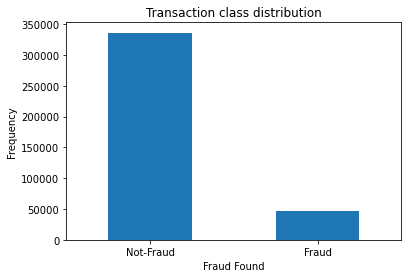

In [11]:
LABELS = ["Not-Fraud", "Fraud"]
count_classes = pd.value_counts(df['Fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Fraud Found")
plt.ylabel("Frequency");

In [12]:
count_classes

0    336187
1     46400
Name: Fraud, dtype: int64

### Replace -NA- values with NULL

In [5]:
df=df.replace('-NA-',np.NaN)

In [6]:
dates_features = ['Treatment Start Date', 'Treatment End Date', 'Claim Settlement Date', 'Claim Reported Date',
                  'Claim Paid Date', 'Policy Commencement Date', 'Policy Effective Date', 'Policy Termination Date',
                  'Birth Date ', 'Insured Original Commencement Date', 'Insured Effective Date', 'Insured Termination Date']

### Converting to date format

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382587 entries, 0 to 382586
Data columns (total 62 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Policy Number                       382587 non-null  object 
 1   Insured Id                          382587 non-null  object 
 2   Claim Identification Number         382587 non-null  object 
 3   Benefit Type                        382587 non-null  object 
 4   Claim Status                        382587 non-null  object 
 5   Treatment Start Date                382587 non-null  object 
 6   Treatment End Date                  352333 non-null  object 
 7   Claim Settlement Date               341601 non-null  object 
 8   Claim Reported Date                 350646 non-null  object 
 9   Claim Billed Amount                 382587 non-null  int64  
 10  Approved / Allowed Amount           382587 non-null  int64  
 11  Payment Denial Reason     

In [8]:
for dates in dates_features:
    df[dates]=pd.to_datetime(df[dates])

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [10]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [108]:
missing_values = missing_value_df.tail(20)

In [109]:
missing_values.to_csv(r"./Data/missing_values.csv", index=False)

<AxesSubplot:>

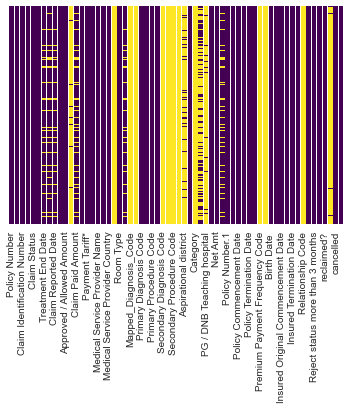

In [105]:
# to check the missing value
sns.heatmap(df.isnull(),cbar=False,yticklabels=False, cmap='viridis')

### Removing features with many missing values

In [13]:
remove_features = ['Claim Identification Number', 'Policy Number', 'Insured Id', 'Aspirational district', 'Medical Service Provider Name', 'Medical Service Provider Country',
                   'PG / DNB Teaching hospital', 'Primary Diagnosis Name', 'Primary Procedure Name', 'Payment Denial Reason',
                   'trigger', 'Category', 'Policy Number.1', 'Insured Id.1', 'diff', 'reclaimed?', 'cancelled',
                   'Relationship Code', 'Mapped_Diagnosis_Name', 'Premium Payment Frequency Code', 'Mapped_Diagnosis_Code',
                   'Doctor Code', 'Secondary Procedure Name', 'Secondary Diagnosis Name', 'Secondary Diagnosis Code',
                   'Plan Codes', 'Secondary Procedure Code']

In [14]:
# Cleaned dataset
cleaned_df = df.drop(remove_features, axis=1)

In [51]:
data_description = pd.DataFrame()

In [56]:
data_description=pd.DataFrame(cleaned_df.columns)

In [57]:
data_description

,0
0,Benefit Type
1,Claim Status
2,Treatment Start Date
3,Treatment End Date
4,Claim Settlement Date
5,Claim Reported Date
6,Claim Billed Amount
7,Approved / Allowed Amount
8,Claim Paid Amount
9,ClaimEvent_TPA_ID


In [58]:
data_description.to_csv(r"./Data/data_description.csv", index=False)

In [59]:
cleaned_df['Claim Paid Amount']=pd.to_numeric(cleaned_df['Claim Paid Amount'], errors='coerce')

<AxesSubplot:>

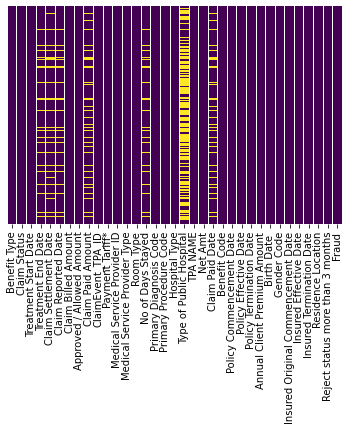

In [61]:
sns.heatmap(cleaned_df.isnull(),cbar=False,yticklabels=False,cmap='viridis', xticklabels=True)

In [62]:
for features in cleaned_df.select_dtypes(include = 'object').columns:
    print(features, ":", cleaned_df[features].unique())

Benefit Type : ['SURGICAL' 'MEDICAL']
Claim Status : ['Paid' 'Cancelled / Rejected' 'Outstanding' 'Pre-Auth Approved']
Medical Service Provider ID : ['HOSP3G91629' 'HOSP3G59002' 'HOSP3G81429' 'HOSP3G82225' 'HOSP3G92566'
 'HOSP3G81922' 'HOSP3G58357' 'HOSP3G81425' 'HOSP3P11538' 'HOSP3G81396'
 'HOSP3P53909' 'HOSP3G80786' 'HOSP3P91871' 'HOSP3G83301' 'HOSP3G99957'
 'HOSP3G58889' 'HOSP3G59094' 'HOSP3G81037' 'HOSP3G84341' 'HOSP3G80815'
 'HOSP37G26966' 'HOSP3P11504' 'HOSP3P15999' 'HOSP3G81950' 'HOSP3P58295'
 'HOSP3G61862' 'HOSP3G82867' 'HOSP3G82001' 'HOSP4G15575' 'HOSP3G84209'
 'HOSP3P68104' 'HOSP3P57234' 'HOSP3P21150' 'HOSP3P28996' 'HOSP3G62650'
 'HOSP3G100093' 'HOSP3G59614' 'HOSP3P49877' 'HOSP3G81952' 'HOSP3P71432'
 'HOSP3G81176' 'HOSP3P62840' 'HOSP3P10675' 'HOSP3P25897' 'HOSP3G81939'
 'HOSP3P57665' 'HOSP3G81096' 'HOSP3P23204' 'HOSP3P14339' 'HOSP3P59413'
 'HOSP3G61363' 'HOSP3G80804' 'HOSP3P102602' 'HOSP3G81986' 'HOSP3G80774'
 'HOSP3P68582' 'HOSP3G81094' 'HOSP3G81642' 'HOSP3P22560' 'HOSP3G931

Type of Public Hospital : [nan 'CHC' 'Civil Hospital' 'SDH' 'DH' 'Medical College' 'PHC']
TPA NAME : ['FHPL' 'Vidal']
Benefit Code : ['SURGICAL' 'MEDICAL']
Annual Client Premium Amount : ['597/Family']
Gender Code : ['Female' 'Male']
Residence Location : ['PATIALA' 'SANGRUR' 'FATEHGARH SAHIB' 'AMRITSAR' 'SRI MUKTSAR SAHIB'
 'LUDHIANA' 'RUPNAGAR' 'FIROZEPUR' 'GURDASPUR' 'MOGA' 'BARNALA'
 'PATHANKOT' 'Tarn Taran' 'KAPURTHALA' 'FARIDKOT' 'FAZILKA' 'HOSHIARPUR'
 'BATHINDA' 'JALANDHAR' 'Shahid Bhagat Singh Nagar' 'S.A.S Nagar' 'MANSA']


### Removing features with less no of unique values

In [63]:
remove_features_less_unique = ['Medical Service Provider Type', 'Room Type', 'Annual Client Premium Amount']

In [64]:
cleaned_df_1 = cleaned_df.drop(remove_features_less_unique, axis=1)

<AxesSubplot:>

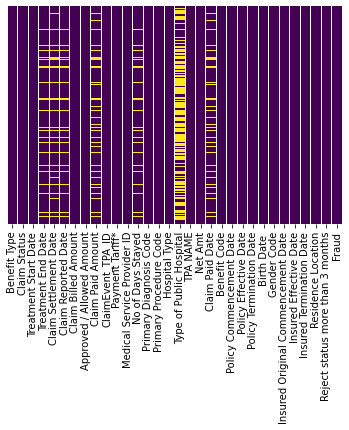

In [65]:
sns.heatmap(cleaned_df_1.isnull(),cbar=False,yticklabels=False,cmap='viridis')

### Split the data into X and y values

In [66]:
X_values = cleaned_df_1.iloc[:,:-1]
y_values = cleaned_df_1.iloc[:,-1]

### Drop columns with similar features

In [67]:
X_values.drop('Insured Original Commencement Date',inplace = True, axis = 1) # policy commencement same as insured commencement
X_values.drop('Insured Effective Date',inplace = True, axis = 1) # policy effective same as insured effective
X_values.drop('Insured Termination Date',inplace = True, axis = 1) # policy termination same as insured termination
X_values.drop('Policy Effective Date',inplace = True, axis = 1) # policy effictive same as commencement
X_values.drop('Claim Paid Date',inplace = True, axis = 1) # paid date same as settlement date

### Feature engineering

In [68]:
X_values['settlement_delay'] = X_values['Claim Settlement Date'] - X_values['Claim Reported Date']
X_values['settlement_delay'] = pd.to_numeric(X_values['settlement_delay'].dt.days, downcast='integer')
X_values['age']=(X_values['Claim Reported Date']-X_values['Birth Date ']).astype('<m8[Y]')
#X_values['dayoftheweekreported'] = X_values['Claim Reported Date'].dt.dayofweek

In [69]:
# Save the file
X_values.to_csv(r"./Data/Pre_Processed.csv", index=False)

# Exploratory Data Analysis

In [70]:
X_values.isnull().sum()

Benefit Type                             0
Claim Status                             0
Treatment Start Date                     0
Treatment End Date                   30254
Claim Settlement Date                40986
Claim Reported Date                  31941
Claim Billed Amount                      0
Approved / Allowed Amount                0
Claim Paid Amount                    57552
ClaimEvent_TPA_ID                        0
Payment Tariff*                       1434
Medical Service Provider ID              0
No of Days Stayed                    30254
Primary Diagnosis Code                   0
Primary Procedure Code                 776
Hospital Type                            0
Type of Public Hospital             227136
TPA NAME                                 0
Net Amt                                  0
Benefit Code                             0
Policy Commencement Date                 0
Policy Termination Date                  0
Birth Date                               0
Gender Code

### Draw histogram

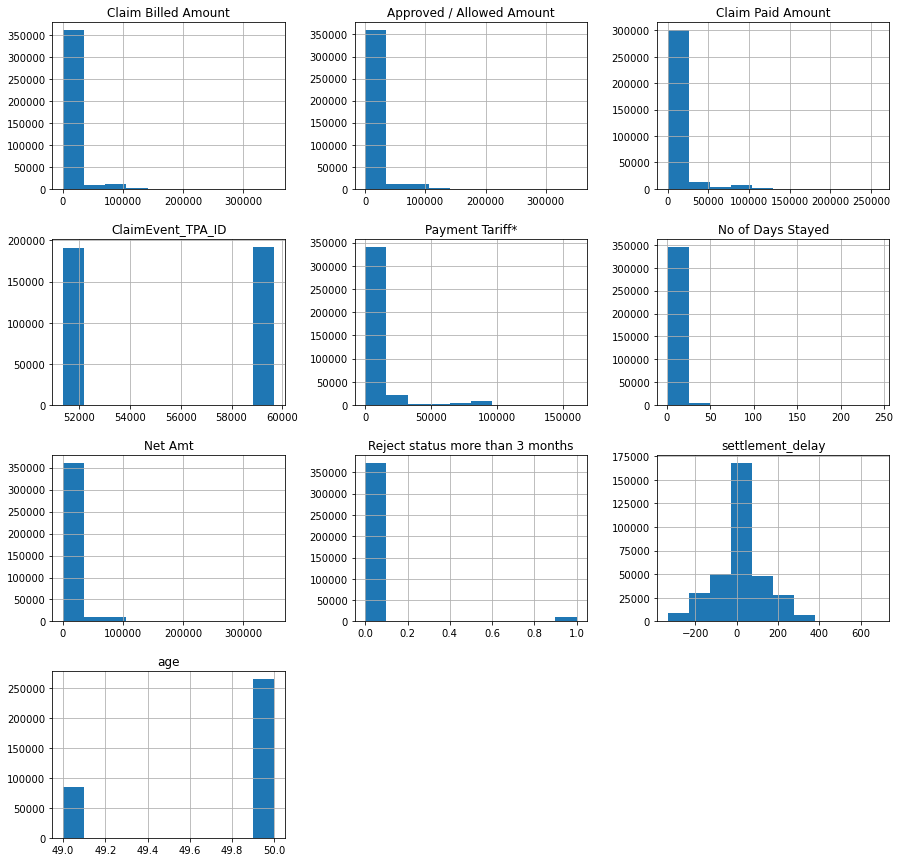

In [73]:
X_values.hist(figsize=(15, 15));

### Correlation matrix

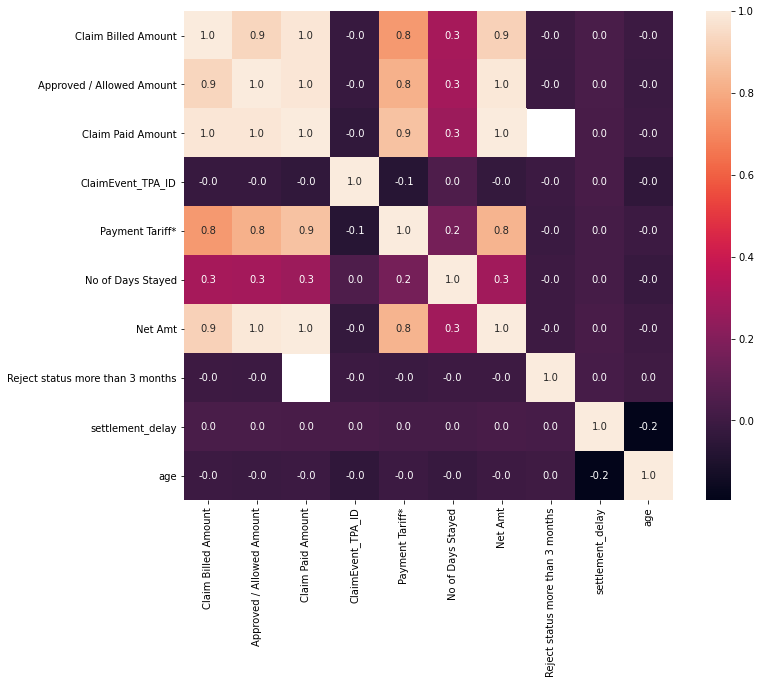

In [74]:
corr = X_values.corr()
fit = plt.figure(figsize=(12, 9))
sns.heatmap(corr, square=True, annot=True, fmt=".2f" );

### Create data with classes

In [75]:
EDA_data = X_values
EDA_data['Class'] = y_values

### Correlation with classes

<AxesSubplot:title={'center':'Correlation with class'}>

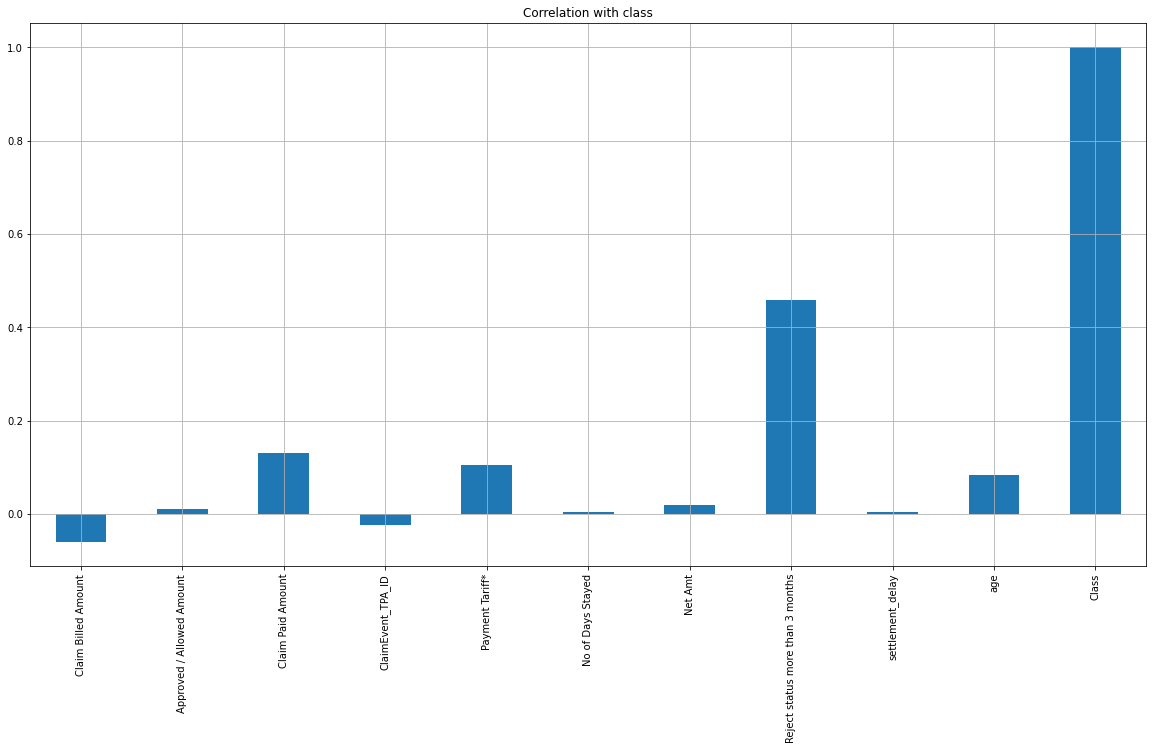

In [76]:
EDA_data.corrwith(EDA_data['Class']).plot.bar(
        figsize = (20, 10), title = "Correlation with class", grid = True)

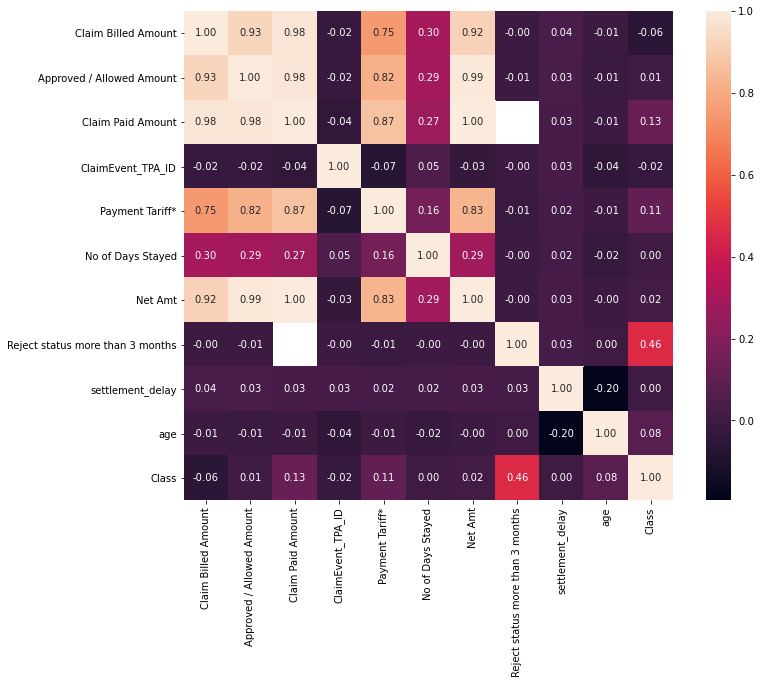

In [77]:
# Compute the correlation matrix
corr = EDA_data.corr()
fit = plt.figure(figsize=(12, 9))
sns.heatmap(corr, square=True, annot=True, fmt=".2f" );

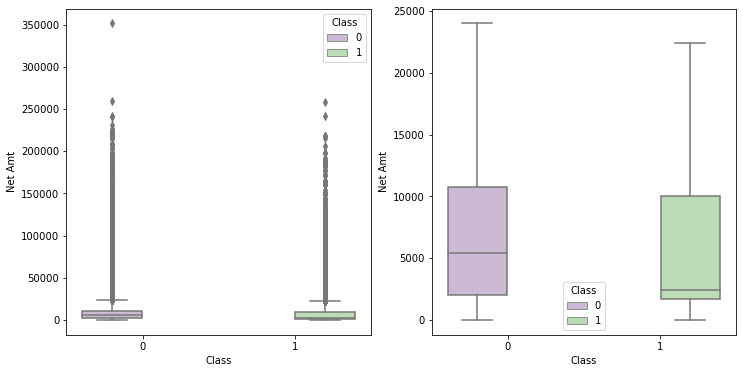

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Net Amt", hue="Class",data=EDA_data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Net Amt", hue="Class",data=EDA_data, palette="PRGn",showfliers=False)
plt.show();

### Feature density plot

C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

<Figure size 432x288 with 0 Axes>

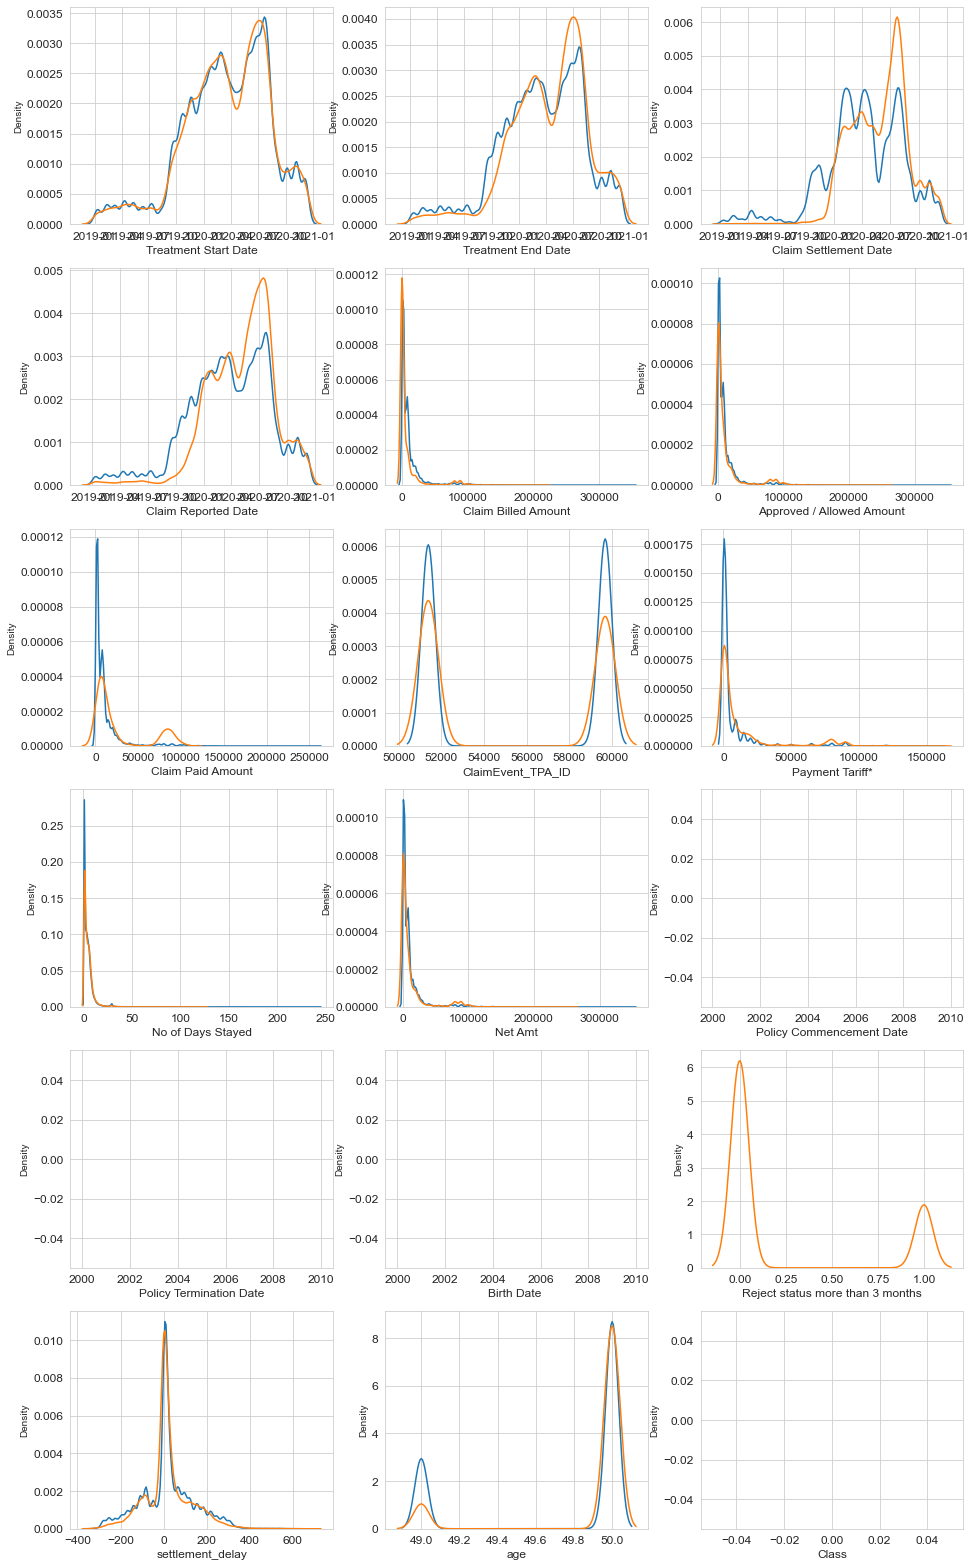

In [79]:
var = EDA_data.select_dtypes(exclude=['object_']).columns.values

i = 0
t0 = EDA_data.loc[EDA_data['Class'] == 0]
t1 = EDA_data.loc[EDA_data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,3,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(6,3,i)
    sns.kdeplot(t0[feature], label="Class = 0")
    sns.kdeplot(t1[feature], label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### Remove features that are correlated

In [80]:
drop_columns = ['Birth Date ', 'Claim Billed Amount', 'Approved / Allowed Amount', 'Claim Paid Amount', 'Payment Tariff*',
                'Type of Public Hospital', 'Treatment End Date', 'Primary Procedure Code', 'Claim Settlement Date']
EDA_data_cleaned = EDA_data.drop(drop_columns, axis=1)

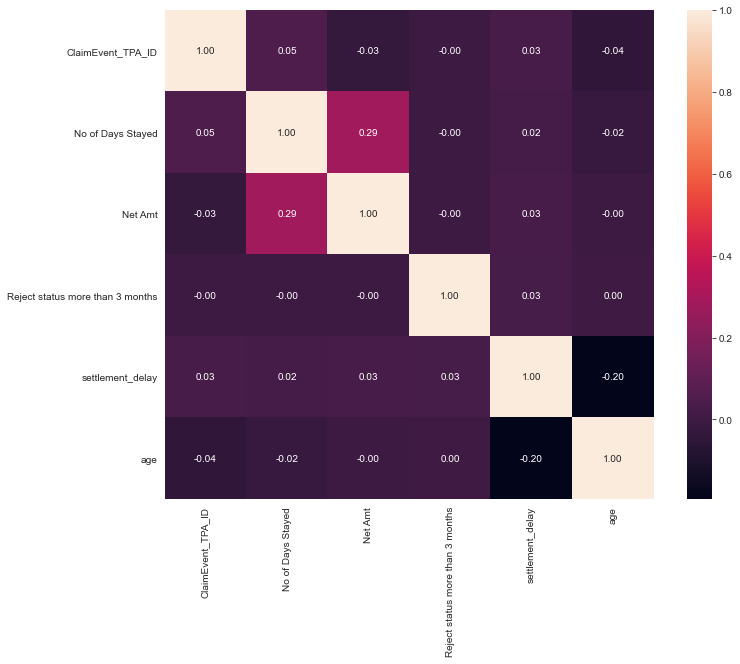

In [81]:
# Compute the correlation matrix
corr = EDA_data_cleaned.drop('Class', axis=1).corr()
fit = plt.figure(figsize=(12, 9))
sns.heatmap(corr, square=True, annot=True, fmt=".2f" );

In [82]:
for features in EDA_data_cleaned.select_dtypes(include = 'object').columns:
    print(features, ":", EDA_data_cleaned[features].unique())

Benefit Type : ['SURGICAL' 'MEDICAL']
Claim Status : ['Paid' 'Cancelled / Rejected' 'Outstanding' 'Pre-Auth Approved']
Medical Service Provider ID : ['HOSP3G91629' 'HOSP3G59002' 'HOSP3G81429' 'HOSP3G82225' 'HOSP3G92566'
 'HOSP3G81922' 'HOSP3G58357' 'HOSP3G81425' 'HOSP3P11538' 'HOSP3G81396'
 'HOSP3P53909' 'HOSP3G80786' 'HOSP3P91871' 'HOSP3G83301' 'HOSP3G99957'
 'HOSP3G58889' 'HOSP3G59094' 'HOSP3G81037' 'HOSP3G84341' 'HOSP3G80815'
 'HOSP37G26966' 'HOSP3P11504' 'HOSP3P15999' 'HOSP3G81950' 'HOSP3P58295'
 'HOSP3G61862' 'HOSP3G82867' 'HOSP3G82001' 'HOSP4G15575' 'HOSP3G84209'
 'HOSP3P68104' 'HOSP3P57234' 'HOSP3P21150' 'HOSP3P28996' 'HOSP3G62650'
 'HOSP3G100093' 'HOSP3G59614' 'HOSP3P49877' 'HOSP3G81952' 'HOSP3P71432'
 'HOSP3G81176' 'HOSP3P62840' 'HOSP3P10675' 'HOSP3P25897' 'HOSP3G81939'
 'HOSP3P57665' 'HOSP3G81096' 'HOSP3P23204' 'HOSP3P14339' 'HOSP3P59413'
 'HOSP3G61363' 'HOSP3G80804' 'HOSP3P102602' 'HOSP3G81986' 'HOSP3G80774'
 'HOSP3P68582' 'HOSP3G81094' 'HOSP3G81642' 'HOSP3P22560' 'HOSP3G931

Gender Code : ['Female' 'Male']
Residence Location : ['PATIALA' 'SANGRUR' 'FATEHGARH SAHIB' 'AMRITSAR' 'SRI MUKTSAR SAHIB'
 'LUDHIANA' 'RUPNAGAR' 'FIROZEPUR' 'GURDASPUR' 'MOGA' 'BARNALA'
 'PATHANKOT' 'Tarn Taran' 'KAPURTHALA' 'FARIDKOT' 'FAZILKA' 'HOSHIARPUR'
 'BATHINDA' 'JALANDHAR' 'Shahid Bhagat Singh Nagar' 'S.A.S Nagar' 'MANSA']


### Fill missing values

In [83]:
median1 = EDA_data_cleaned['No of Days Stayed'].median()
print(median1)
EDA_data_cleaned['No of Days Stayed'].replace(np.nan,median1,inplace = True)

3.0


In [84]:
mean1 = int(EDA_data_cleaned['settlement_delay'].mean())
print(mean1)

17


In [85]:
EDA_data_cleaned['settlement_delay'].replace(np.nan,mean1,inplace = True)

In [86]:
categorical_feature = ['Reject status more than 3 months', 'ClaimEvent_TPA_ID']

In [87]:
mean2 = int(EDA_data_cleaned['age'].mean())
print(mean2)

49


In [88]:
EDA_data_cleaned['age'].replace(np.nan,mean2,inplace = True)

In [89]:
EDA_data_cleaned.isnull().sum()

Benefit Type                            0
Claim Status                            0
Treatment Start Date                    0
Claim Reported Date                 31941
ClaimEvent_TPA_ID                       0
Medical Service Provider ID             0
No of Days Stayed                       0
Primary Diagnosis Code                  0
Hospital Type                           0
TPA NAME                                0
Net Amt                                 0
Benefit Code                            0
Policy Commencement Date                0
Policy Termination Date                 0
Gender Code                             0
Residence Location                      0
Reject status more than 3 months        0
settlement_delay                        0
age                                     0
Class                                   0
dtype: int64

In [90]:
EDA_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382587 entries, 0 to 382586
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Benefit Type                      382587 non-null  object        
 1   Claim Status                      382587 non-null  object        
 2   Treatment Start Date              382587 non-null  datetime64[ns]
 3   Claim Reported Date               350646 non-null  datetime64[ns]
 4   ClaimEvent_TPA_ID                 382587 non-null  int64         
 5   Medical Service Provider ID       382587 non-null  object        
 6   No of Days Stayed                 382587 non-null  float64       
 7   Primary Diagnosis Code            382587 non-null  object        
 8   Hospital Type                     382587 non-null  object        
 9   TPA NAME                          382587 non-null  object        
 10  Net Amt                         

<AxesSubplot:>

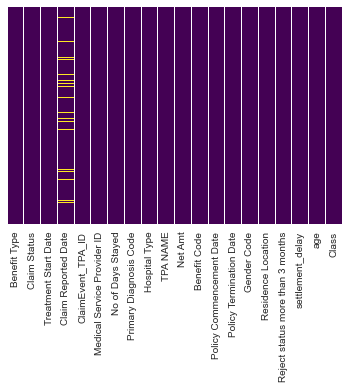

In [91]:
sns.heatmap(EDA_data_cleaned.isnull(),cbar=False,yticklabels=False,cmap='viridis')

### Filling missing data by random choosing from non missing values 

In [92]:
EDA_data_cleaned['Claim Reported Date']

0        2020-01-01 16:07:00
1        2020-06-17 09:13:00
2        2019-11-29 09:32:00
3        2020-06-27 08:47:00
4        2020-01-23 14:41:00
                 ...        
382582   2019-10-18 15:36:00
382583   2020-06-02 13:03:00
382584   2019-01-11 13:00:00
382585   2020-07-17 11:12:00
382586   2019-09-22 14:16:00
Name: Claim Reported Date, Length: 382587, dtype: datetime64[ns]

In [93]:
EDA_data_cleaned['Claim Reported Date'].isnull().sum()

31941

In [94]:
EDA_data_cleaned['Claim Reported Date'].fillna(random.choice(EDA_data_cleaned[EDA_data_cleaned['Claim Reported Date'] != np.nan]['Claim Reported Date']), inplace=True) 

<AxesSubplot:>

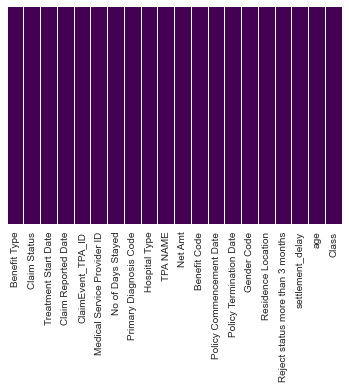

In [95]:
sns.heatmap(EDA_data_cleaned.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [96]:
EDA_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382587 entries, 0 to 382586
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Benefit Type                      382587 non-null  object        
 1   Claim Status                      382587 non-null  object        
 2   Treatment Start Date              382587 non-null  datetime64[ns]
 3   Claim Reported Date               382587 non-null  datetime64[ns]
 4   ClaimEvent_TPA_ID                 382587 non-null  int64         
 5   Medical Service Provider ID       382587 non-null  object        
 6   No of Days Stayed                 382587 non-null  float64       
 7   Primary Diagnosis Code            382587 non-null  object        
 8   Hospital Type                     382587 non-null  object        
 9   TPA NAME                          382587 non-null  object        
 10  Net Amt                         

In [97]:
EDA_data_cleaned['Start_year'] = EDA_data_cleaned['Treatment Start Date'].dt.year
EDA_data_cleaned['Start_month'] = EDA_data_cleaned['Treatment Start Date'].dt.month
EDA_data_cleaned['Start_week'] = EDA_data_cleaned['Treatment Start Date'].dt.week
EDA_data_cleaned['Start_day'] = EDA_data_cleaned['Treatment Start Date'].dt.day
EDA_data_cleaned['Start_dayofweek'] = EDA_data_cleaned['Treatment Start Date'].dt.dayofweek

EDA_data_cleaned['Reported_year'] = EDA_data_cleaned['Claim Reported Date'].dt.year
EDA_data_cleaned['Reported_month'] = EDA_data_cleaned['Claim Reported Date'].dt.month
EDA_data_cleaned['Reported_week'] = EDA_data_cleaned['Claim Reported Date'].dt.week
EDA_data_cleaned['Reported_day'] = EDA_data_cleaned['Claim Reported Date'].dt.day
EDA_data_cleaned['Reported_dayofweek'] = EDA_data_cleaned['Claim Reported Date'].dt.dayofweek

EDA_data_cleaned['Commencement_year'] = EDA_data_cleaned['Policy Commencement Date'].dt.year
EDA_data_cleaned['Commencement_month'] = EDA_data_cleaned['Policy Commencement Date'].dt.month
EDA_data_cleaned['Commencement_week'] = EDA_data_cleaned['Policy Commencement Date'].dt.week
EDA_data_cleaned['Commencement_day'] = EDA_data_cleaned['Policy Commencement Date'].dt.day
EDA_data_cleaned['Commencement_dayofweek'] = EDA_data_cleaned['Policy Commencement Date'].dt.dayofweek

EDA_data_cleaned['Termination_year'] = EDA_data_cleaned['Policy Termination Date'].dt.year
EDA_data_cleaned['Termination_month'] = EDA_data_cleaned['Policy Termination Date'].dt.month
EDA_data_cleaned['Termination_week'] = EDA_data_cleaned['Policy Termination Date'].dt.week
EDA_data_cleaned['Termination_day'] = EDA_data_cleaned['Policy Termination Date'].dt.day
EDA_data_cleaned['Termination_dayofweek'] = EDA_data_cleaned['Policy Termination Date'].dt.dayofweek

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [98]:
drop_features = ['Treatment Start Date', 'Claim Reported Date', 'Policy Commencement Date', 'Policy Termination Date']
EDA_data_cleaned.drop(drop_features, axis=1, inplace=True)

In [99]:
EDA_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382587 entries, 0 to 382586
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Benefit Type                      382587 non-null  object 
 1   Claim Status                      382587 non-null  object 
 2   ClaimEvent_TPA_ID                 382587 non-null  int64  
 3   Medical Service Provider ID       382587 non-null  object 
 4   No of Days Stayed                 382587 non-null  float64
 5   Primary Diagnosis Code            382587 non-null  object 
 6   Hospital Type                     382587 non-null  object 
 7   TPA NAME                          382587 non-null  object 
 8   Net Amt                           382587 non-null  int64  
 9   Benefit Code                      382587 non-null  object 
 10  Gender Code                       382587 non-null  object 
 11  Residence Location                382587 non-null  o

In [100]:
df1 = EDA_data_cleaned.pop('Class')

In [101]:
EDA_data_cleaned['Class'] =df1

In [102]:
EDA_data_cleaned['settlement_delay']=EDA_data_cleaned['settlement_delay'].astype('int64')
EDA_data_cleaned['age']=EDA_data_cleaned['age'].astype('int64')
EDA_data_cleaned['No of Days Stayed']=EDA_data_cleaned['No of Days Stayed'].astype('int64')
EDA_data_cleaned['ClaimEvent_TPA_ID']=EDA_data_cleaned['ClaimEvent_TPA_ID'].astype('object')
EDA_data_cleaned['Reject status more than 3 months']=EDA_data_cleaned['Reject status more than 3 months'].astype('object')
EDA_data_cleaned['Class']=EDA_data_cleaned['Class'].astype('object')

In [103]:
EDA_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382587 entries, 0 to 382586
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Benefit Type                      382587 non-null  object
 1   Claim Status                      382587 non-null  object
 2   ClaimEvent_TPA_ID                 382587 non-null  object
 3   Medical Service Provider ID       382587 non-null  object
 4   No of Days Stayed                 382587 non-null  int64 
 5   Primary Diagnosis Code            382587 non-null  object
 6   Hospital Type                     382587 non-null  object
 7   TPA NAME                          382587 non-null  object
 8   Net Amt                           382587 non-null  int64 
 9   Benefit Code                      382587 non-null  object
 10  Gender Code                       382587 non-null  object
 11  Residence Location                382587 non-null  object
 12  Re

In [63]:
EDA_data_cleaned.to_csv(r"./Data/Cleaned.csv", index=False)